In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.style as style
import seaborn as sns
import numpy as np

In [27]:
df = pd.read_csv('cars.csv')

In [5]:
df

,ID,Brand,Country,Prio,Warranty,Leasing month
0,1,Nissan,Poland,1,2,7000
1,2,Toyota,France,4,0,2983
2,3,Nissan,France,4,2,2888
3,4,Volkswagen,Italy,1,4,6060
4,5,Ford,United Kingdom,1,1,7640
5,6,Ford,Italy,3,2,4091
6,7,BMW,Germany,2,1,6020
7,8,Mercedes-Benz,Germany,4,3,2890
8,9,Mercedes-Benz,United Kingdom,2,2,4902
9,10,Nissan,Italy,3,3,3901


Zaimportowane dane przedstawiają klientów danych marek samochodowych. Zawarte są informacje o marce, narowodości priorytecie, gwarancji oraz miesięcznej kwocie leasingu za auto.

In [6]:
df['Brand'].unique()

array(['Nissan', 'Toyota', 'Volkswagen', 'Ford', 'BMW', 'Mercedes-Benz',
       'Honda'], dtype=object)

In [7]:
df['Brand'].value_counts()

Volkswagen       9
Ford             9
Nissan           7
Toyota           7
BMW              7
Mercedes-Benz    6
Honda            5
Name: Brand, dtype: int64

In [9]:
df['Country'].unique()

array(['Poland', 'France', 'Italy', 'United Kingdom', 'Germany'],
      dtype=object)

In [10]:
df['Warranty'].unique()

array([2, 0, 4, 1, 3, 5], dtype=int64)

In [11]:
df['Prio'].unique()

array([1, 4, 3, 2, 5], dtype=int64)

Text(0, 0.5, 'Counts')

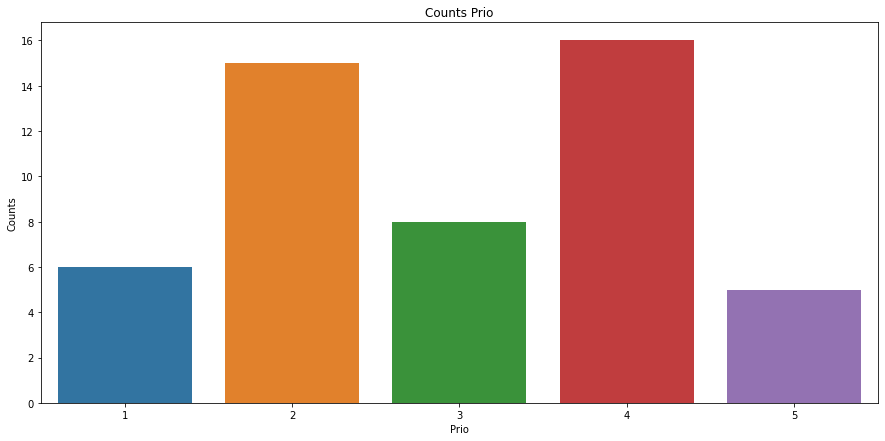

In [21]:
plt.rcParams['figure.figsize']=(15,7)
sns.countplot(x=df["Prio"])
plt.title('Counts Prio')
plt.xlabel('Prio')
plt.ylabel('Counts')

Text(0.5, 1.0, 'Leasing monthly')

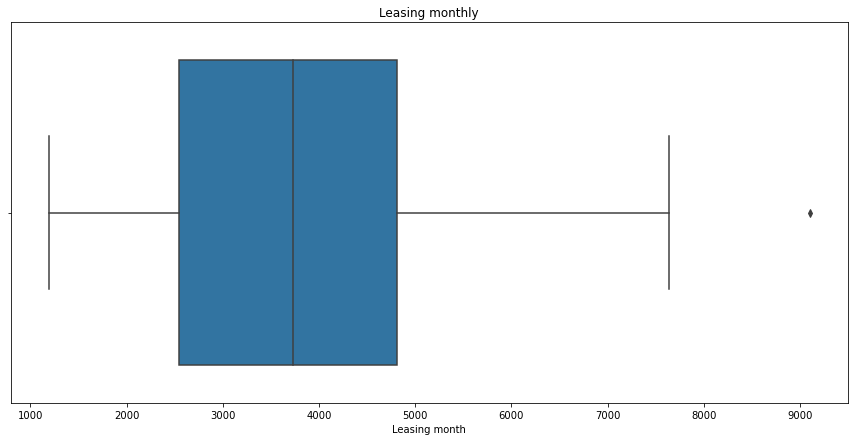

In [18]:
plt.rcParams['figure.figsize']=(15,7)
sns.boxplot(x=df["Leasing month"])
plt.title('Leasing monthly')

<AxesSubplot:xlabel='Leasing month', ylabel='Count'>

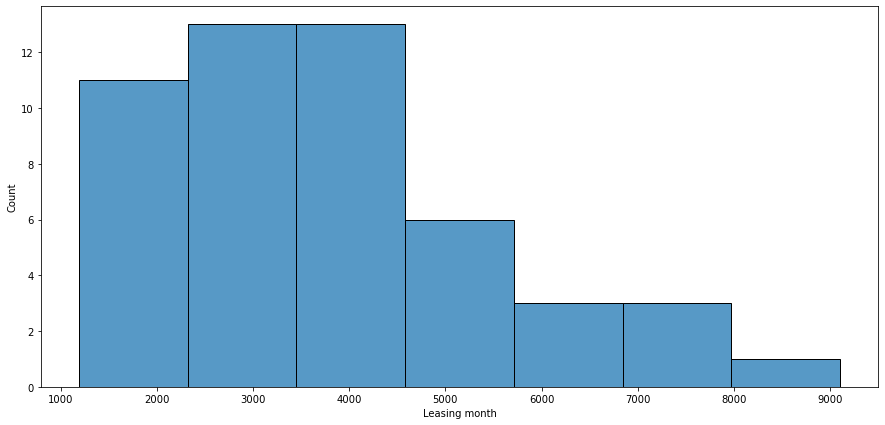

In [20]:
plt.rcParams['figure.figsize']=(15,7)
sns.histplot(x=df["Leasing month"])

Text(0.5, 1.0, 'Leasing Month vs Prio')

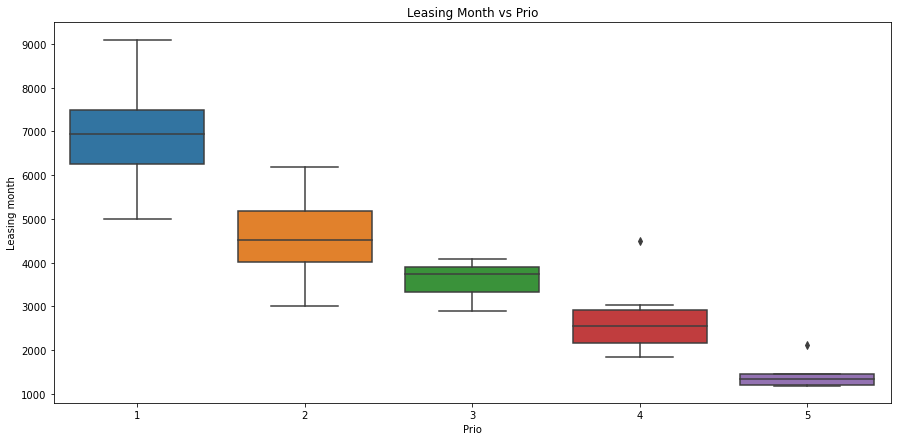

In [22]:
plt.rcParams['figure.figsize']=(15,7)
sns.boxplot(data=df, y="Leasing month", x="Prio")
plt.title('Leasing Month vs Prio')

In [23]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [28]:
df = df.drop(columns=['ID'])
df

,Brand,Country,Prio,Warranty,Leasing month
0,Nissan,Poland,1,2,7000
1,Toyota,France,4,0,2983
2,Nissan,France,4,2,2888
3,Volkswagen,Italy,1,4,6060
4,Ford,United Kingdom,1,1,7640
5,Ford,Italy,3,2,4091
6,BMW,Germany,2,1,6020
7,Mercedes-Benz,Germany,4,3,2890
8,Mercedes-Benz,United Kingdom,2,2,4902
9,Nissan,Italy,3,3,3901


In [31]:
scaler = preprocessing.MinMaxScaler()
df[['Warranty', 'Leasing month' ]] = scaler.fit_transform(df[['Warranty', 'Leasing month']])
features = df.drop(columns='Prio')
X = pd.get_dummies(features, columns=['Country', 'Brand'])
y = df['Prio'] 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=123)

In [34]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [35]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=17, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\Baca\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Baca\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Baca\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


LR: 0.266667 (0.210159)
LDA: 0.458333 (0.208333)
KNN: 0.258333 (0.208999)
CART: 0.591667 (0.306073)
NB: 0.191667 (0.170986)
SVM: 0.266667 (0.097183)


C:\Users\Baca\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Baca\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Baca\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


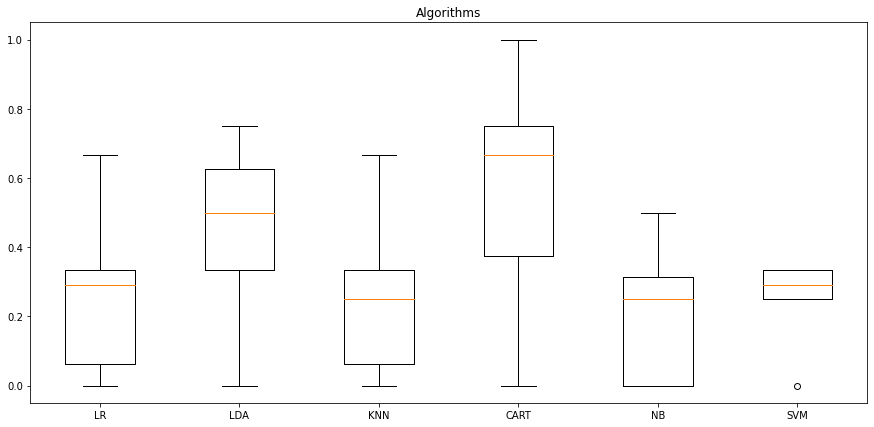

In [39]:
plt.boxplot(results, labels=names)
plt.title('Algorithms')
plt.show()

In [37]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [38]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2 0 0 0 0]
 [0 4 1 0 0]
 [0 0 2 0 0]
 [0 1 1 2 1]
 [0 0 0 1 0]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.80      0.80      0.80         5
           3       0.50      1.00      0.67         2
           4       0.67      0.40      0.50         5
           5       0.00      0.00      0.00         1

    accuracy                           0.67        15
   macro avg       0.59      0.64      0.59        15
weighted avg       0.69      0.67      0.66        15

